<a href="https://colab.research.google.com/github/fracrumatte/MLDL/blob/matte/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries/code
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt

from torch import nn
from torchvision import transforms, datasets

import os

from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [ ]:
# Create a transforms pipeline
simple_transform = transforms.Compose([
    transforms.Resize((224, 224)), # 1. Reshape all images to 224x224 (though some models may require different sizes)
    transforms.ToTensor(), # 2. Turn image values to between 0 & 1
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 3. A mean of [0.485, 0.456, 0.406] (across each colour channel)
                         std=[0.229, 0.224, 0.225]) # 4. A standard deviation of [0.229, 0.224, 0.225] (across each colour channel),
])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path_tokyo = "/content/drive/MyDrive/tokyo_xs/test/"
#data_path_sf = "/content/drive/MyDrive/sf_xs/val/"
#data_path_gsv = ""

test_dset = ImageFolder(f"{data_path_tokyo}", transform=simple_transform)
#val_dset = ImageFolder(f"{data_path_sf}", transform=simple_transform)
#train_dset = ImageFolder(f"{data_path_gsv}", transform=simple_transform)


test_dataloader = DataLoader(test_dset, batch_size=32, num_workers=2)
#val_dataloader = DataLoader(val_dset, batch_size=32, num_workers=2)
#train_dataloader = DataLoader(train_dset, batch_size=32, num_workers=2)


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


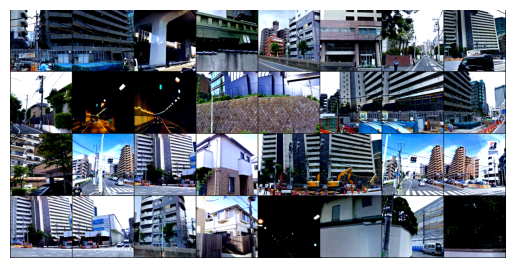

In [ ]:
from torchvision.utils import make_grid
def show_images(images):


    # Denormalize images
    denormalized = images * 0.5 + 0.5  # Assuming images are normalized in range [-1, 1]
    # Make a grid of images
    grid = make_grid(denormalized)
    # Convert torch tensor to numpy array
    np_grid = grid.permute(1, 2, 0).numpy()
    # Display images
    plt.imshow(np_grid)
    plt.axis('off')
    plt.show()

# Get a batch of test images
images, _ = next(iter(test_dataloader))  # Assuming test_loader yields (images, labels)

# Display the images
show_images(images)

# dummy row